# Flipkart Review Sentiment Analysis
## Step 1: Importing Libraries and the datasets required

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('/Users/yashp/Downloads/flipkart_data.csv')
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


## Step 2: Preprocessing and cleaning the reviews

In [4]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<AxesSubplot:xlabel='rating', ylabel='count'>

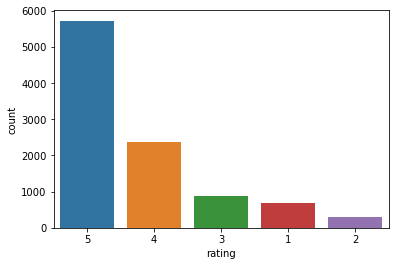

In [5]:
sns.countplot(data=data,x='rating',order=data.rating.value_counts().index)

In [6]:
# rating label(final)
pos_neg = []
for i in range(len(data['rating'])):
    if data['rating'][i] >= 5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

data['label'] = pos_neg


In [7]:
from tqdm import tqdm

In [8]:
def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		# Removing punctuations
		sentence = re.sub(r'[^\w\s]', '', sentence)

		# Converting lowercase and removing stopwords
		preprocessed_text.append(' '.join(token.lower()
                                          for token in nltk.word_tokenize(sentence)
                                              if token.lower() not in stopwords.words('english')))

	return preprocessed_text


In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████████| 9976/9976 [00:49<00:00, 202.06it/s]


In [11]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome soundvery pretty see nd sound quality ...,5,1
2,awesome sound quality pros 78 hrs battery life...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


## Step 3: Analysis of the Dataset

In [12]:
data['label'].value_counts()

1    5726
0    4250
Name: label, dtype: int64

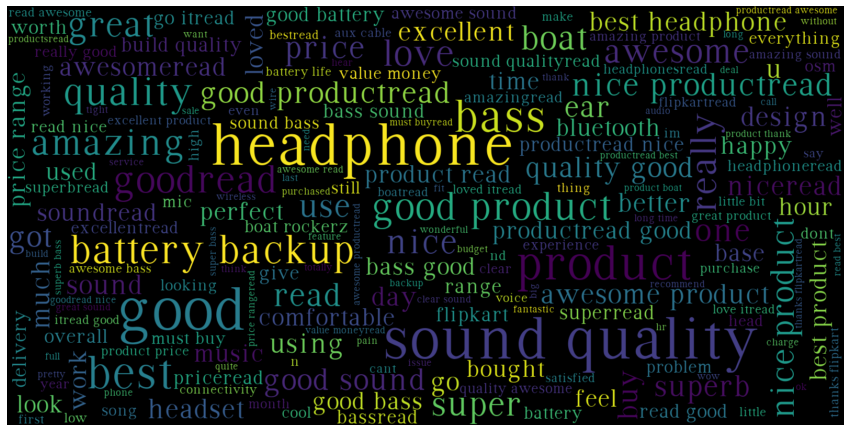

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your data and filtering logic
consolidated = ' '.join(word for word in data['review'][data['label'] == 1].astype(str))

# Specify a TrueType font file path
font_path = '/Users/yashp/Downloads/vip_roman_6918339/VIPRoman-Regular.ttf'  # Replace with the actual font file path

wordCloud = WordCloud(
    width=1600,
    height=800,
    random_state=21,
    max_font_size=110,
    font_path=font_path  # Specify the font path
)

plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


## Step 5: Converting text into Vectors

In [14]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review'] ).toarray()

In [15]:
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Step 6: Model training, Evaluation, and Prediction

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],test_size=0.33,stratify=data['label'],random_state = 42)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9247344007182403


In [30]:
from sklearn.metrics import plot_confusion_matrix

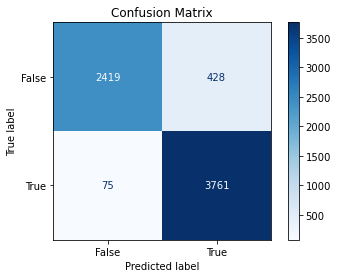

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

# Assuming y_train and pred are your actual data
cm = confusion_matrix(y_train, pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot(cmap=plt.cm.Blues)  # You can specify a color map
plt.title("Confusion Matrix")
plt.show()
